In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

from sampler import sample_from_logreg

import numpy as np
import matplotlib.pyplot as plt

from cv_svm import SVM_smooth

#import matplotlib
#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

In [2]:
#X, y = load_breast_cancer(return_X_y=True)
#X, y = make_classification(n_samples=250, n_features=50)
X, _, y = sample_from_logreg(n=250, p=20, seed=120)
n = X.shape[0]
p = X.shape[1]
y[np.where(y == 0)] = -1

In [3]:
X_scaled = StandardScaler().fit_transform(X)
#X_scaled = X
print(X_scaled.shape)

(250, 20)


In [4]:
clf = SVC(kernel='linear')
clf.fit(X_scaled, y)
sk_coef_og = clf.coef_.flatten()
sk_coef = clf.coef_/np.linalg.norm(clf.coef_)
print(clf.coef_)
print(clf.intercept_)

[[ 1.44119178e+00 -2.29122060e-01 -4.73133921e-01 -5.71197691e-01
  -9.23568038e-02 -4.16302288e-01  2.29394113e-01 -2.91213658e-02
  -1.85803923e-01  1.53175947e-01  2.37632445e-01  1.26117844e-01
   1.51192806e-01 -1.06962035e-03  1.36621515e-02  4.48711746e-01
   1.74007771e+00  2.70215171e-02 -2.03117321e+00  3.15806682e-02]]
[-0.02560786]


In [5]:
y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

0.88

In [6]:
sigma = 1e-5
lbd = 1

In [7]:
# calculate maximum bound
from sklearn.metrics import pairwise_distances
m_max = np.min(pairwise_distances(X))**2
print(m_max)

C = np.linalg.norm(X.T @ X)/(n - 1)

max_bound = 1 + C/(lbd * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
print(max_bound)

# what lambda do we have to pick?
b = 200
lbd_pick = C/((b - 1) * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
lbd_pick

0.0
231284.8670604874


1162.2304877411427

In [8]:
clf = SVM_smooth(sigma=sigma, lbd=lbd)
clf.fit(X_scaled, y, thresh=1e-7, n_iter=2500, eta=0.5/n,
        approx_cv=True, cv=True, log_iter=True, log_iacv=True,
        save_cond_nums=True, save_err_approx=True, save_err_cv=True,
        warm_start=0, normalise=False, adjust_factor=True,
        save_hessian_norms=True)
print(f"grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))}")
coef = clf.weights_/np.linalg.norm(clf.weights_)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

iter 0 | grad 0.70880 | objective 1.00000 | IACV: 0.00000567 | baseline: 0.00141235
iter 1 | grad 0.70738 | objective 0.99970 | IACV: 0.00001133 | baseline: 0.00140516
iter 2 | grad 0.70596 | objective 0.99941 | IACV: 0.00001698 | baseline: 0.00139885
iter 3 | grad 0.70455 | objective 0.99911 | IACV: 0.00002262 | baseline: 0.00139344
iter 4 | grad 0.70314 | objective 0.99882 | IACV: 0.00002825 | baseline: 0.00138894
iter 5 | grad 0.70174 | objective 0.99853 | IACV: 0.00003386 | baseline: 0.00138535
iter 6 | grad 0.70033 | objective 0.99823 | IACV: 0.00003947 | baseline: 0.00138266
iter 7 | grad 0.69893 | objective 0.99794 | IACV: 0.00004506 | baseline: 0.00138089
iter 8 | grad 0.69753 | objective 0.99765 | IACV: 0.00005064 | baseline: 0.00138002
iter 9 | grad 0.69614 | objective 0.99736 | IACV: 0.00005621 | baseline: 0.00138005
iter 10 | grad 0.69475 | objective 0.99707 | IACV: 0.00006177 | baseline: 0.00138098
iter 11 | grad 0.69336 | objective 0.99678 | IACV: 0.00006732 | baseline: 0

iter 101 | grad 0.57904 | objective 0.97291 | IACV: 0.00052383 | baseline: 0.00328741
iter 102 | grad 0.57788 | objective 0.97267 | IACV: 0.00052845 | baseline: 0.00331401
iter 103 | grad 0.57672 | objective 0.97242 | IACV: 0.00053307 | baseline: 0.00334061
iter 104 | grad 0.57557 | objective 0.97218 | IACV: 0.00053767 | baseline: 0.00336719
iter 105 | grad 0.57442 | objective 0.97194 | IACV: 0.00054227 | baseline: 0.00339377
iter 106 | grad 0.57327 | objective 0.97170 | IACV: 0.00054686 | baseline: 0.00342033
iter 107 | grad 0.57212 | objective 0.97146 | IACV: 0.00055144 | baseline: 0.00344688
iter 108 | grad 0.57098 | objective 0.97122 | IACV: 0.00055601 | baseline: 0.00347342
iter 109 | grad 0.56984 | objective 0.97099 | IACV: 0.00056057 | baseline: 0.00349994
iter 110 | grad 0.56870 | objective 0.97075 | IACV: 0.00056512 | baseline: 0.00352644
iter 111 | grad 0.56756 | objective 0.97051 | IACV: 0.00056966 | baseline: 0.00355293
iter 112 | grad 0.56642 | objective 0.97027 | IACV: 0.

iter 209 | grad 0.46645 | objective 0.94940 | IACV: 0.00098537 | baseline: 0.00598672
iter 210 | grad 0.44932 | objective 0.94921 | IACV: 0.00097073 | baseline: 0.00600612
iter 211 | grad 0.44842 | objective 0.94904 | IACV: 0.00096351 | baseline: 0.00602525
iter 212 | grad 0.44753 | objective 0.94887 | IACV: 0.00095999 | baseline: 0.00604500
iter 213 | grad 0.44663 | objective 0.94869 | IACV: 0.00096055 | baseline: 0.00606597
iter 214 | grad 0.44574 | objective 0.94852 | IACV: 0.00096320 | baseline: 0.00608796
iter 215 | grad 0.44485 | objective 0.94835 | IACV: 0.00096661 | baseline: 0.00611045
iter 216 | grad 0.44396 | objective 0.94818 | IACV: 0.00097002 | baseline: 0.00613291
iter 217 | grad 0.44307 | objective 0.94801 | IACV: 0.00097353 | baseline: 0.00615543
iter 218 | grad 0.44218 | objective 0.94784 | IACV: 0.00097704 | baseline: 0.00617791
iter 219 | grad 0.44130 | objective 0.94767 | IACV: 0.00098055 | baseline: 0.00620035
iter 220 | grad 0.44041 | objective 0.94750 | IACV: 0.

iter 313 | grad 0.36560 | objective 0.93308 | IACV: 0.00129680 | baseline: 0.00813327
iter 314 | grad 0.36487 | objective 0.93294 | IACV: 0.00129989 | baseline: 0.00815203
iter 315 | grad 0.36414 | objective 0.93280 | IACV: 0.00130297 | baseline: 0.00817075
iter 316 | grad 0.36341 | objective 0.93266 | IACV: 0.00130605 | baseline: 0.00818944
iter 317 | grad 0.36268 | objective 0.93252 | IACV: 0.00130912 | baseline: 0.00820809
iter 318 | grad 0.36196 | objective 0.93238 | IACV: 0.00131218 | baseline: 0.00822670
iter 319 | grad 0.36123 | objective 0.93224 | IACV: 0.00131524 | baseline: 0.00824528
iter 320 | grad 0.36051 | objective 0.93210 | IACV: 0.00131829 | baseline: 0.00826382
iter 321 | grad 0.35979 | objective 0.93196 | IACV: 0.00132133 | baseline: 0.00828233
iter 322 | grad 0.35907 | objective 0.93182 | IACV: 0.00132437 | baseline: 0.00830080
iter 323 | grad 0.35835 | objective 0.93169 | IACV: 0.00132741 | baseline: 0.00831923
iter 324 | grad 0.35763 | objective 0.93155 | IACV: 0.

iter 414 | grad 0.28893 | objective 0.92054 | IACV: 0.00153568 | baseline: 0.00981889
iter 415 | grad 0.28836 | objective 0.92043 | IACV: 0.00153822 | baseline: 0.00983421
iter 416 | grad 0.28778 | objective 0.92033 | IACV: 0.00154075 | baseline: 0.00984950
iter 417 | grad 0.28720 | objective 0.92022 | IACV: 0.00154327 | baseline: 0.00986477
iter 418 | grad 0.28663 | objective 0.92012 | IACV: 0.00154580 | baseline: 0.00988000
iter 419 | grad 0.28606 | objective 0.92001 | IACV: 0.00154832 | baseline: 0.00989520
iter 420 | grad 0.28548 | objective 0.91991 | IACV: 0.00155084 | baseline: 0.00991037
iter 421 | grad 0.28491 | objective 0.91980 | IACV: 0.00155336 | baseline: 0.00992551
iter 422 | grad 0.28434 | objective 0.91970 | IACV: 0.00155588 | baseline: 0.00994063
iter 423 | grad 0.28378 | objective 0.91960 | IACV: 0.00155839 | baseline: 0.00995571
iter 424 | grad 0.28321 | objective 0.91949 | IACV: 0.00156090 | baseline: 0.00997076
iter 425 | grad 0.28264 | objective 0.91939 | IACV: 0.

iter 511 | grad 0.21318 | objective 0.91222 | IACV: 0.00170998 | baseline: 0.01096339
iter 512 | grad 0.21275 | objective 0.91215 | IACV: 0.00171409 | baseline: 0.01097268
iter 513 | grad 0.21233 | objective 0.91208 | IACV: 0.00171935 | baseline: 0.01098210
iter 514 | grad 0.21190 | objective 0.91202 | IACV: 0.00172566 | baseline: 0.01099173
iter 515 | grad 0.21148 | objective 0.91195 | IACV: 0.00173255 | baseline: 0.01100143
iter 516 | grad 0.21106 | objective 0.91189 | IACV: 0.00174027 | baseline: 0.01101105
iter 517 | grad 0.21064 | objective 0.91182 | IACV: 0.00174857 | baseline: 0.01102081
iter 518 | grad 0.21021 | objective 0.91176 | IACV: 0.00175728 | baseline: 0.01103061
iter 519 | grad 0.20979 | objective 0.91169 | IACV: 0.00176684 | baseline: 0.01104048
iter 520 | grad 0.20161 | objective 0.91163 | IACV: 0.00175576 | baseline: 0.01105035
iter 521 | grad 0.20119 | objective 0.91157 | IACV: 0.00174870 | baseline: 0.01105792
iter 522 | grad 0.20078 | objective 0.91151 | IACV: 0.

iter 616 | grad 0.15876 | objective 0.90646 | IACV: 0.00197251 | baseline: 0.01198077
iter 617 | grad 0.15845 | objective 0.90641 | IACV: 0.00197368 | baseline: 0.01198565
iter 618 | grad 0.15813 | objective 0.90637 | IACV: 0.00197586 | baseline: 0.01199056
iter 619 | grad 0.15781 | objective 0.90633 | IACV: 0.00197933 | baseline: 0.01199553
iter 620 | grad 0.15750 | objective 0.90628 | IACV: 0.00198368 | baseline: 0.01200055
iter 621 | grad 0.15718 | objective 0.90624 | IACV: 0.00198900 | baseline: 0.01200569
iter 622 | grad 0.15687 | objective 0.90619 | IACV: 0.00199491 | baseline: 0.01201091
iter 623 | grad 0.15655 | objective 0.90615 | IACV: 0.00200137 | baseline: 0.01201626
iter 624 | grad 0.15624 | objective 0.90611 | IACV: 0.00200829 | baseline: 0.01202169
iter 625 | grad 0.14794 | objective 0.90607 | IACV: 0.00199933 | baseline: 0.01202725
iter 626 | grad 0.14764 | objective 0.90603 | IACV: 0.00199171 | baseline: 0.01203063
iter 627 | grad 0.14735 | objective 0.90599 | IACV: 0.

iter 721 | grad 0.11535 | objective 0.90270 | IACV: 0.00233490 | baseline: 0.01267198
iter 722 | grad 0.11512 | objective 0.90267 | IACV: 0.00233856 | baseline: 0.01267438
iter 723 | grad 0.11489 | objective 0.90264 | IACV: 0.00234301 | baseline: 0.01267685
iter 724 | grad 0.11465 | objective 0.90261 | IACV: 0.00234828 | baseline: 0.01267943
iter 725 | grad 0.10731 | objective 0.90258 | IACV: 0.00233839 | baseline: 0.01268215
iter 726 | grad 0.10709 | objective 0.90256 | IACV: 0.00233005 | baseline: 0.01268239
iter 727 | grad 0.10687 | objective 0.90253 | IACV: 0.00232265 | baseline: 0.01268277
iter 728 | grad 0.10666 | objective 0.90251 | IACV: 0.00231629 | baseline: 0.01268331
iter 729 | grad 0.10645 | objective 0.90248 | IACV: 0.00231088 | baseline: 0.01268398
iter 730 | grad 0.10623 | objective 0.90246 | IACV: 0.00230663 | baseline: 0.01268482
iter 731 | grad 0.10602 | objective 0.90243 | IACV: 0.00230357 | baseline: 0.01268582
iter 732 | grad 0.10581 | objective 0.90241 | IACV: 0.

iter 817 | grad 0.08410 | objective 0.90051 | IACV: 0.00260633 | baseline: 0.01305616
iter 818 | grad 0.08393 | objective 0.90049 | IACV: 0.00259993 | baseline: 0.01305885
iter 819 | grad 0.08376 | objective 0.90048 | IACV: 0.00259389 | baseline: 0.01306160
iter 820 | grad 0.08359 | objective 0.90046 | IACV: 0.00258801 | baseline: 0.01306447
iter 821 | grad 0.08343 | objective 0.90044 | IACV: 0.00258250 | baseline: 0.01306739
iter 822 | grad 0.08326 | objective 0.90042 | IACV: 0.00257749 | baseline: 0.01307020
iter 823 | grad 0.08309 | objective 0.90040 | IACV: 0.00257279 | baseline: 0.01307307
iter 824 | grad 0.08293 | objective 0.90039 | IACV: 0.00256840 | baseline: 0.01307599
iter 825 | grad 0.08276 | objective 0.90037 | IACV: 0.00256440 | baseline: 0.01307891
iter 826 | grad 0.08260 | objective 0.90035 | IACV: 0.00256076 | baseline: 0.01308182
iter 827 | grad 0.08243 | objective 0.90033 | IACV: 0.00255738 | baseline: 0.01308474
iter 828 | grad 0.08227 | objective 0.90031 | IACV: 0.

iter 926 | grad 0.06152 | objective 0.89883 | IACV: 0.00314559 | baseline: 0.01320236
iter 927 | grad 0.06140 | objective 0.89881 | IACV: 0.00315493 | baseline: 0.01320291
iter 928 | grad 0.06128 | objective 0.89880 | IACV: 0.00316473 | baseline: 0.01320350
iter 929 | grad 0.06115 | objective 0.89879 | IACV: 0.00317490 | baseline: 0.01320417
iter 930 | grad 0.06103 | objective 0.89878 | IACV: 0.00318537 | baseline: 0.01320493
iter 931 | grad 0.06091 | objective 0.89876 | IACV: 0.00319628 | baseline: 0.01320574
iter 932 | grad 0.06079 | objective 0.89875 | IACV: 0.00320774 | baseline: 0.01320659
iter 933 | grad 0.06067 | objective 0.89874 | IACV: 0.00321941 | baseline: 0.01320753
iter 934 | grad 0.06051 | objective 0.89873 | IACV: 0.00321606 | baseline: 0.01320860
iter 935 | grad 0.05548 | objective 0.89872 | IACV: 0.00321398 | baseline: 0.01320969
iter 936 | grad 0.05537 | objective 0.89871 | IACV: 0.00321334 | baseline: 0.01320787
iter 937 | grad 0.05526 | objective 0.89870 | IACV: 0.

iter 1023 | grad 0.04341 | objective 0.89798 | IACV: 0.00348232 | baseline: 0.01318635
iter 1024 | grad 0.04332 | objective 0.89798 | IACV: 0.00348938 | baseline: 0.01318860
iter 1025 | grad 0.04323 | objective 0.89797 | IACV: 0.00349708 | baseline: 0.01319081
iter 1026 | grad 0.04315 | objective 0.89796 | IACV: 0.00350429 | baseline: 0.01319322
iter 1027 | grad 0.04305 | objective 0.89795 | IACV: 0.00351082 | baseline: 0.01319581
iter 1028 | grad 0.03799 | objective 0.89795 | IACV: 0.00350375 | baseline: 0.01319816
iter 1029 | grad 0.03775 | objective 0.89794 | IACV: 0.00346316 | baseline: 0.01319741
iter 1030 | grad 0.03766 | objective 0.89794 | IACV: 0.00344645 | baseline: 0.01319638
iter 1031 | grad 0.03758 | objective 0.89793 | IACV: 0.00343467 | baseline: 0.01319553
iter 1032 | grad 0.03751 | objective 0.89793 | IACV: 0.00342469 | baseline: 0.01319474
iter 1033 | grad 0.03743 | objective 0.89792 | IACV: 0.00341600 | baseline: 0.01319391
iter 1034 | grad 0.03735 | objective 0.8979

iter 1121 | grad 0.03138 | objective 0.89749 | IACV: 0.00344873 | baseline: 0.01331643
iter 1122 | grad 0.03132 | objective 0.89748 | IACV: 0.00345275 | baseline: 0.01331864
iter 1123 | grad 0.03126 | objective 0.89748 | IACV: 0.00345622 | baseline: 0.01332120
iter 1124 | grad 0.03119 | objective 0.89748 | IACV: 0.00346018 | baseline: 0.01332354
iter 1125 | grad 0.03113 | objective 0.89747 | IACV: 0.00346426 | baseline: 0.01332589
iter 1126 | grad 0.03107 | objective 0.89747 | IACV: 0.00346792 | baseline: 0.01332837
iter 1127 | grad 0.03101 | objective 0.89746 | IACV: 0.00347218 | baseline: 0.01333072
iter 1128 | grad 0.03095 | objective 0.89746 | IACV: 0.00347609 | baseline: 0.01333304
iter 1129 | grad 0.03088 | objective 0.89745 | IACV: 0.00347977 | baseline: 0.01333567
iter 1130 | grad 0.03082 | objective 0.89745 | IACV: 0.00348370 | baseline: 0.01333815
iter 1131 | grad 0.03076 | objective 0.89744 | IACV: 0.00348803 | baseline: 0.01334048
iter 1132 | grad 0.03070 | objective 0.8974

iter 1222 | grad 0.02564 | objective 0.89709 | IACV: 0.00398388 | baseline: 0.01357256
iter 1223 | grad 0.02559 | objective 0.89709 | IACV: 0.00399211 | baseline: 0.01357533
iter 1224 | grad 0.02553 | objective 0.89709 | IACV: 0.00399964 | baseline: 0.01357823
iter 1225 | grad 0.02548 | objective 0.89708 | IACV: 0.00400748 | baseline: 0.01358106
iter 1226 | grad 0.02543 | objective 0.89708 | IACV: 0.00401567 | baseline: 0.01358393
iter 1227 | grad 0.02538 | objective 0.89708 | IACV: 0.00402346 | baseline: 0.01358696
iter 1228 | grad 0.02533 | objective 0.89707 | IACV: 0.00403138 | baseline: 0.01358991
iter 1229 | grad 0.02528 | objective 0.89707 | IACV: 0.00403959 | baseline: 0.01359281
iter 1230 | grad 0.02523 | objective 0.89707 | IACV: 0.00404815 | baseline: 0.01359573
iter 1231 | grad 0.02518 | objective 0.89706 | IACV: 0.00405623 | baseline: 0.01359884
iter 1232 | grad 0.02513 | objective 0.89706 | IACV: 0.00406436 | baseline: 0.01360181
iter 1233 | grad 0.02508 | objective 0.8970

iter 1330 | grad 0.01703 | objective 0.89685 | IACV: 0.00377284 | baseline: 0.01368088
iter 1331 | grad 0.01754 | objective 0.89685 | IACV: 0.00377430 | baseline: 0.01368232
iter 1332 | grad 0.02154 | objective 0.89685 | IACV: 0.00377530 | baseline: 0.01368313
iter 1333 | grad 0.01760 | objective 0.89684 | IACV: 0.00376960 | baseline: 0.01368580
iter 1334 | grad 0.01753 | objective 0.89684 | IACV: 0.00376629 | baseline: 0.01368644
iter 1335 | grad 0.01688 | objective 0.89684 | IACV: 0.00376339 | baseline: 0.01368741
iter 1336 | grad 0.01739 | objective 0.89684 | IACV: 0.00376461 | baseline: 0.01368919
iter 1337 | grad 0.02138 | objective 0.89684 | IACV: 0.00376532 | baseline: 0.01368990
iter 1338 | grad 0.01745 | objective 0.89683 | IACV: 0.00376144 | baseline: 0.01369214
iter 1339 | grad 0.01738 | objective 0.89683 | IACV: 0.00375722 | baseline: 0.01369323
iter 1340 | grad 0.01671 | objective 0.89683 | IACV: 0.00375534 | baseline: 0.01369403
iter 1341 | grad 0.01723 | objective 0.8968

iter 1438 | grad 0.01467 | objective 0.89667 | IACV: 0.00375804 | baseline: 0.01384561
iter 1439 | grad 0.01460 | objective 0.89667 | IACV: 0.00375768 | baseline: 0.01384725
iter 1440 | grad 0.01381 | objective 0.89667 | IACV: 0.00375965 | baseline: 0.01384830
iter 1441 | grad 0.01444 | objective 0.89667 | IACV: 0.00376219 | baseline: 0.01385010
iter 1442 | grad 0.01910 | objective 0.89667 | IACV: 0.00376444 | baseline: 0.01385157
iter 1443 | grad 0.01454 | objective 0.89666 | IACV: 0.00376398 | baseline: 0.01385377
iter 1444 | grad 0.01447 | objective 0.89666 | IACV: 0.00376462 | baseline: 0.01385519
iter 1445 | grad 0.01369 | objective 0.89666 | IACV: 0.00376510 | baseline: 0.01385672
iter 1446 | grad 0.01432 | objective 0.89666 | IACV: 0.00376853 | baseline: 0.01385835
iter 1447 | grad 0.01899 | objective 0.89666 | IACV: 0.00377025 | baseline: 0.01385992
iter 1448 | grad 0.01442 | objective 0.89666 | IACV: 0.00377047 | baseline: 0.01386196
iter 1449 | grad 0.01435 | objective 0.8966

iter 1545 | grad 0.01136 | objective 0.89653 | IACV: 0.00395470 | baseline: 0.01401374
iter 1546 | grad 0.01213 | objective 0.89653 | IACV: 0.00395815 | baseline: 0.01401530
iter 1547 | grad 0.01741 | objective 0.89653 | IACV: 0.00396012 | baseline: 0.01401685
iter 1548 | grad 0.01227 | objective 0.89653 | IACV: 0.00396254 | baseline: 0.01401846
iter 1549 | grad 0.01219 | objective 0.89653 | IACV: 0.00396421 | baseline: 0.01401993
iter 1550 | grad 0.01125 | objective 0.89653 | IACV: 0.00396647 | baseline: 0.01402133
iter 1551 | grad 0.01203 | objective 0.89653 | IACV: 0.00397042 | baseline: 0.01402260
iter 1552 | grad 0.01735 | objective 0.89653 | IACV: 0.00397280 | baseline: 0.01402420
iter 1553 | grad 0.01217 | objective 0.89652 | IACV: 0.00397439 | baseline: 0.01402585
iter 1554 | grad 0.01210 | objective 0.89652 | IACV: 0.00397695 | baseline: 0.01402726
iter 1555 | grad 0.01116 | objective 0.89652 | IACV: 0.00397862 | baseline: 0.01402863
iter 1556 | grad 0.01194 | objective 0.8965

iter 1652 | grad 0.01622 | objective 0.89642 | IACV: 0.00424071 | baseline: 0.01416222
iter 1653 | grad 0.01051 | objective 0.89642 | IACV: 0.00424297 | baseline: 0.01416373
iter 1654 | grad 0.01043 | objective 0.89642 | IACV: 0.00424563 | baseline: 0.01416496
iter 1655 | grad 0.00932 | objective 0.89642 | IACV: 0.00424852 | baseline: 0.01416628
iter 1656 | grad 0.01026 | objective 0.89642 | IACV: 0.00425205 | baseline: 0.01416744
iter 1657 | grad 0.01617 | objective 0.89642 | IACV: 0.00425496 | baseline: 0.01416869
iter 1658 | grad 0.01044 | objective 0.89642 | IACV: 0.00425702 | baseline: 0.01417019
iter 1659 | grad 0.01036 | objective 0.89642 | IACV: 0.00426011 | baseline: 0.01417128
iter 1660 | grad 0.00924 | objective 0.89642 | IACV: 0.00426285 | baseline: 0.01417268
iter 1661 | grad 0.01018 | objective 0.89642 | IACV: 0.00426625 | baseline: 0.01417389
iter 1662 | grad 0.01613 | objective 0.89642 | IACV: 0.00426895 | baseline: 0.01417507
iter 1663 | grad 0.01036 | objective 0.8964

iter 1759 | grad 0.00909 | objective 0.89634 | IACV: 0.00454339 | baseline: 0.01429340
iter 1760 | grad 0.00780 | objective 0.89634 | IACV: 0.00454684 | baseline: 0.01429456
iter 1761 | grad 0.00890 | objective 0.89634 | IACV: 0.00454984 | baseline: 0.01429531
iter 1762 | grad 0.01535 | objective 0.89634 | IACV: 0.00455221 | baseline: 0.01429655
iter 1763 | grad 0.00912 | objective 0.89633 | IACV: 0.00455504 | baseline: 0.01429785
iter 1764 | grad 0.00903 | objective 0.89633 | IACV: 0.00455820 | baseline: 0.01429878
iter 1765 | grad 0.00773 | objective 0.89633 | IACV: 0.00456045 | baseline: 0.01429987
iter 1766 | grad 0.00885 | objective 0.89633 | IACV: 0.00456354 | baseline: 0.01430119
iter 1767 | grad 0.01531 | objective 0.89633 | IACV: 0.00456573 | baseline: 0.01430237
iter 1768 | grad 0.00906 | objective 0.89633 | IACV: 0.00456848 | baseline: 0.01430358
iter 1769 | grad 0.00898 | objective 0.89633 | IACV: 0.00457183 | baseline: 0.01430455
iter 1770 | grad 0.00767 | objective 0.8963

iter 1865 | grad 0.00581 | objective 0.89627 | IACV: 0.00445570 | baseline: 0.01440410
iter 1866 | grad 0.00699 | objective 0.89627 | IACV: 0.00445589 | baseline: 0.01440488
iter 1867 | grad 0.01527 | objective 0.89627 | IACV: 0.00445564 | baseline: 0.01440579
iter 1868 | grad 0.00807 | objective 0.89627 | IACV: 0.00445768 | baseline: 0.01440679
iter 1869 | grad 0.00791 | objective 0.89627 | IACV: 0.00446510 | baseline: 0.01440771
iter 1870 | grad 0.00607 | objective 0.89627 | IACV: 0.00446367 | baseline: 0.01440871
iter 1871 | grad 0.00751 | objective 0.89626 | IACV: 0.00446820 | baseline: 0.01440950
iter 1872 | grad 0.01523 | objective 0.89626 | IACV: 0.00446715 | baseline: 0.01441053
iter 1873 | grad 0.00804 | objective 0.89626 | IACV: 0.00446945 | baseline: 0.01441128
iter 1874 | grad 0.00788 | objective 0.89626 | IACV: 0.00447464 | baseline: 0.01441226
iter 1875 | grad 0.00589 | objective 0.89626 | IACV: 0.00447494 | baseline: 0.01441305
iter 1876 | grad 0.00733 | objective 0.8962

iter 1972 | grad 0.00720 | objective 0.89621 | IACV: 0.00449405 | baseline: 0.01447633
iter 1973 | grad 0.00680 | objective 0.89621 | IACV: 0.00449159 | baseline: 0.01447695
iter 1974 | grad 0.00674 | objective 0.89621 | IACV: 0.00448797 | baseline: 0.01447738
iter 1975 | grad 0.00695 | objective 0.89621 | IACV: 0.00448652 | baseline: 0.01447747
iter 1976 | grad 0.00916 | objective 0.89621 | IACV: 0.00448438 | baseline: 0.01447787
iter 1977 | grad 0.00711 | objective 0.89621 | IACV: 0.00448192 | baseline: 0.01447823
iter 1978 | grad 0.00619 | objective 0.89621 | IACV: 0.00448044 | baseline: 0.01447841
iter 1979 | grad 0.01485 | objective 0.89621 | IACV: 0.00447745 | baseline: 0.01447886
iter 1980 | grad 0.00716 | objective 0.89621 | IACV: 0.00447599 | baseline: 0.01447911
iter 1981 | grad 0.00679 | objective 0.89621 | IACV: 0.00447466 | baseline: 0.01447955
iter 1982 | grad 0.00443 | objective 0.89621 | IACV: 0.00447157 | baseline: 0.01448007
iter 1983 | grad 0.00484 | objective 0.8962

iter 2081 | grad 0.01011 | objective 0.89618 | IACV: 0.00446362 | baseline: 0.01451210
iter 2082 | grad 0.00671 | objective 0.89618 | IACV: 0.00446486 | baseline: 0.01451216
iter 2083 | grad 0.00608 | objective 0.89618 | IACV: 0.00446512 | baseline: 0.01451281
iter 2084 | grad 0.01421 | objective 0.89618 | IACV: 0.00446440 | baseline: 0.01451308
iter 2085 | grad 0.00673 | objective 0.89617 | IACV: 0.00446573 | baseline: 0.01451326
iter 2086 | grad 0.00637 | objective 0.89617 | IACV: 0.00446630 | baseline: 0.01451368
iter 2087 | grad 0.00401 | objective 0.89617 | IACV: 0.00446552 | baseline: 0.01451404
iter 2088 | grad 0.01009 | objective 0.89617 | IACV: 0.00446427 | baseline: 0.01451421
iter 2089 | grad 0.00668 | objective 0.89617 | IACV: 0.00446657 | baseline: 0.01451445
iter 2090 | grad 0.00605 | objective 0.89617 | IACV: 0.00446652 | baseline: 0.01451506
iter 2091 | grad 0.01420 | objective 0.89617 | IACV: 0.00446626 | baseline: 0.01451533
iter 2092 | grad 0.00671 | objective 0.8961

iter 2188 | grad 0.00576 | objective 0.89615 | IACV: 0.00457827 | baseline: 0.01454402
iter 2189 | grad 0.01408 | objective 0.89615 | IACV: 0.00457906 | baseline: 0.01454444
iter 2190 | grad 0.00645 | objective 0.89615 | IACV: 0.00458106 | baseline: 0.01454459
iter 2191 | grad 0.00608 | objective 0.89615 | IACV: 0.00458358 | baseline: 0.01454492
iter 2192 | grad 0.00352 | objective 0.89615 | IACV: 0.00458497 | baseline: 0.01454523
iter 2193 | grad 0.00991 | objective 0.89615 | IACV: 0.00458556 | baseline: 0.01454543
iter 2194 | grad 0.00640 | objective 0.89615 | IACV: 0.00458899 | baseline: 0.01454546
iter 2195 | grad 0.00574 | objective 0.89615 | IACV: 0.00459064 | baseline: 0.01454629
iter 2196 | grad 0.01407 | objective 0.89615 | IACV: 0.00459097 | baseline: 0.01454647
iter 2197 | grad 0.00644 | objective 0.89614 | IACV: 0.00459520 | baseline: 0.01454631
iter 2198 | grad 0.00606 | objective 0.89614 | IACV: 0.00459625 | baseline: 0.01454692
iter 2199 | grad 0.00349 | objective 0.8961

iter 2296 | grad 0.00587 | objective 0.89612 | IACV: 0.00480723 | baseline: 0.01457256
iter 2297 | grad 0.00316 | objective 0.89612 | IACV: 0.00480965 | baseline: 0.01457280
iter 2298 | grad 0.00979 | objective 0.89612 | IACV: 0.00481131 | baseline: 0.01457274
iter 2299 | grad 0.00621 | objective 0.89612 | IACV: 0.00481535 | baseline: 0.01457280
iter 2300 | grad 0.00553 | objective 0.89612 | IACV: 0.00481639 | baseline: 0.01457347
iter 2301 | grad 0.01398 | objective 0.89612 | IACV: 0.00481870 | baseline: 0.01457370
iter 2302 | grad 0.00625 | objective 0.89612 | IACV: 0.00482151 | baseline: 0.01457385
iter 2303 | grad 0.00586 | objective 0.89612 | IACV: 0.00482393 | baseline: 0.01457445
iter 2304 | grad 0.00314 | objective 0.89612 | IACV: 0.00482546 | baseline: 0.01457448
iter 2305 | grad 0.00978 | objective 0.89612 | IACV: 0.00482797 | baseline: 0.01457467
iter 2306 | grad 0.00620 | objective 0.89612 | IACV: 0.00483144 | baseline: 0.01457460
iter 2307 | grad 0.00552 | objective 0.8961

iter 2402 | grad 0.00289 | objective 0.89611 | IACV: 0.00506520 | baseline: 0.01459628
iter 2403 | grad 0.00970 | objective 0.89610 | IACV: 0.00506690 | baseline: 0.01459634
iter 2404 | grad 0.00609 | objective 0.89610 | IACV: 0.00507121 | baseline: 0.01459637
iter 2405 | grad 0.00539 | objective 0.89610 | IACV: 0.00507358 | baseline: 0.01459680
iter 2406 | grad 0.01393 | objective 0.89610 | IACV: 0.00507474 | baseline: 0.01459683
iter 2407 | grad 0.00612 | objective 0.89610 | IACV: 0.00507839 | baseline: 0.01459702
iter 2408 | grad 0.00573 | objective 0.89610 | IACV: 0.00508063 | baseline: 0.01459757
iter 2409 | grad 0.00288 | objective 0.89610 | IACV: 0.00508202 | baseline: 0.01459776
iter 2410 | grad 0.00970 | objective 0.89610 | IACV: 0.00508475 | baseline: 0.01459773
iter 2411 | grad 0.00608 | objective 0.89610 | IACV: 0.00508755 | baseline: 0.01459785
iter 2412 | grad 0.00538 | objective 0.89610 | IACV: 0.00509098 | baseline: 0.01459825
iter 2413 | grad 0.01392 | objective 0.8961

0.832

In [9]:
iacv_coef = normalize(clf.loo_iacv_, axis=1)
true_coef = normalize(clf.loo_true_, axis=1)
print(np.mean(np.linalg.norm(iacv_coef - true_coef, 2, axis=1)))
print(np.mean(np.linalg.norm(coef - true_coef, 2, axis=1)))

0.00173581407799087
0.02174301728805848


In [10]:
print(np.std(clf.loo_iacv_))
print(np.std(clf.loo_true_))

0.12445846
0.12422324824596846


In [11]:
print(np.mean(clf.loo_iacv_, axis=0))
print(np.mean(clf.loo_true_, axis=0))

[ 0.25717157 -0.02863216 -0.07968131 -0.09331661  0.02760509 -0.03052021
  0.01168971  0.00733371 -0.03301996  0.00201156  0.06195779  0.07281999
  0.03581093  0.01155409 -0.01849838  0.07291663  0.3429617  -0.04210098
 -0.30459785  0.02814867]
[ 0.25667838 -0.02858151 -0.07940418 -0.09330336  0.02766322 -0.03037808
  0.01178501  0.00740066 -0.03302761  0.00194719  0.06165918  0.07277882
  0.03581931  0.01152115 -0.01846153  0.07263484  0.34224673 -0.04210147
 -0.30410616  0.02810465]


In [12]:
print("percentage difference between IACV and true CV mean")
print(np.abs(np.mean(clf.loo_iacv_, axis=0) - np.mean(clf.loo_true_, axis=0)).sum()/(np.mean(clf.loo_true_, axis=0)).sum())
print("percentage difference between w_hat and true CV mean")
print(np.abs(clf.weights_ - np.mean(clf.loo_true_, axis=0)).sum()/(np.mean(clf.loo_true_, axis=0)).sum())

percentage difference between IACV and true CV mean
0.010701064827021446
percentage difference between w_hat and true CV mean
0.012565292856255048


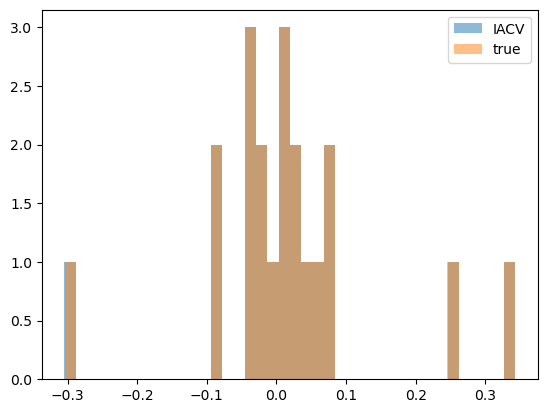

In [13]:
plt.hist(np.mean(clf.loo_iacv_, axis=0), alpha=0.5, bins=40, label="IACV")
plt.hist(np.mean(clf.loo_true_, axis=0), alpha=0.5, bins=40, label="true")
plt.legend()

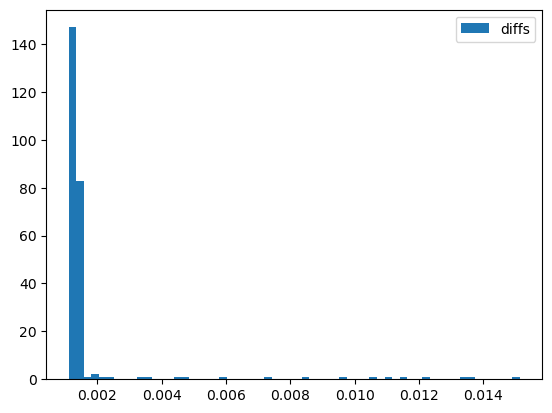

In [14]:
plt.hist(np.linalg.norm(clf.loo_iacv_ - clf.loo_true_, axis=1), bins=60, label="diffs")
plt.legend()

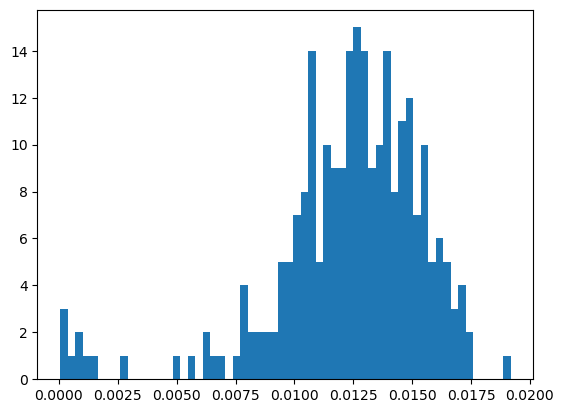

In [15]:
plt.hist(np.linalg.norm(clf.weights_ - clf.loo_true_, axis=1), bins=60, label="diffs")
plt.show()

In [16]:
clf.loo_iacv_

Array([[ 0.25962302, -0.02333348, -0.0807143 , ..., -0.0429199 ,
        -0.29961735,  0.02975601],
       [ 0.25364804, -0.0280668 , -0.07534243, ..., -0.03948596,
        -0.30672628,  0.02539684],
       [ 0.25964117, -0.03023442, -0.07576422, ..., -0.04286707,
        -0.30279598,  0.0228433 ],
       ...,
       [ 0.25588438, -0.02509678, -0.08025065, ..., -0.04168062,
        -0.3078475 ,  0.02868967],
       [ 0.2558921 , -0.02848981, -0.08259553, ..., -0.04890994,
        -0.30218068,  0.02767216],
       [ 0.2597097 , -0.02142279, -0.07872226, ..., -0.04338353,
        -0.30554995,  0.03022488]], dtype=float32)

In [17]:
clf.loo_true_

array([[ 0.25814833, -0.02607135, -0.0804288 , ..., -0.04279346,
        -0.30100403,  0.02876881],
       [ 0.25306851, -0.02806569, -0.07515091, ..., -0.0395139 ,
        -0.30609573,  0.02538861],
       [ 0.25900318, -0.03016678, -0.07553563, ..., -0.04291326,
        -0.30215397,  0.02283431],
       ...,
       [ 0.25526311, -0.02506868, -0.07992196, ..., -0.04161709,
        -0.30720799,  0.02871158],
       [ 0.25716031, -0.0286353 , -0.07987554, ..., -0.04264398,
        -0.30451776,  0.02808766],
       [ 0.25907858, -0.02141389, -0.07851158, ..., -0.04341013,
        -0.30492816,  0.03017499]])

In [18]:
iacv_mean = np.mean(clf.loo_iacv_, axis=0)
coef = iacv_mean/np.linalg.norm(iacv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.04057139903306961 | pct 0.0145555529743433


In [19]:
true_cv_mean = np.mean(clf.loo_true_, axis=0)
coef = true_cv_mean/np.linalg.norm(true_cv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.04059819143503683 | pct 0.014563336682808072


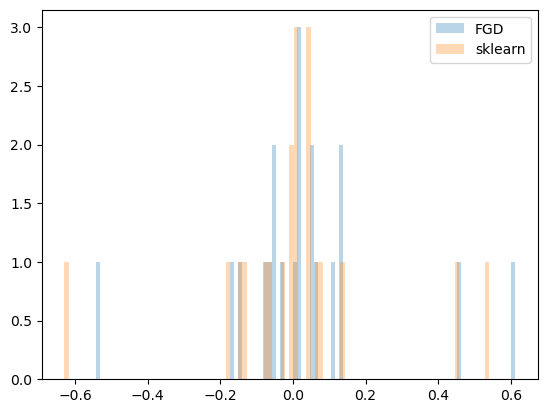

In [20]:
coef = clf.weights_/np.linalg.norm(clf.weights_)
nbin = 100
plt.hist(coef, bins=nbin, label="FGD", alpha=0.3)
plt.hist(sk_coef.flatten(), bins=nbin, label="sklearn", alpha=0.3)
plt.legend()
plt.show()

In [31]:
fig, ax = plt.subplots()
ax.plot(np.min(clf.cond_nums_, axis=1), label="Min Condition Number", c='b')
ax.plot(np.max(clf.cond_nums_, axis=1), label="Max Condition Number", c='r')
ax.plot(np.mean(clf.cond_nums_, axis=1), label="Mean Condition Number", c='purple')
ax.plot(clf.cond_num_bound_, label="Bound", c="black", linestyle="--")

#ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Condition No.")
ws = 1.95 # 1.75
hs = 1.85 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
#fig.legend()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.show()
plt.savefig('svm_conv_bound_cond_no.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_16812/300035429.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


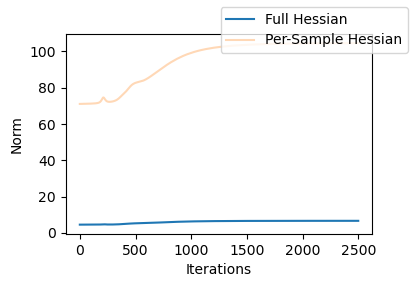

In [22]:
fig, ax = plt.subplots()
hess_norms = np.asarray(clf.hess_norms_)
ax.plot(hess_norms[:, 0], label="Full Hessian")
ax.plot(hess_norms[:, 1], label="Per-Sample Hessian", alpha=0.3)

#ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Norm")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
fig.legend()
plt.show()

In [23]:
np.mean(clf.cond_nums_, axis=1)[np.argmax(np.mean(clf.cond_nums_, axis=1))]

2.2849135

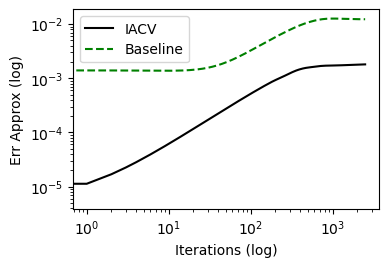

<Figure size 640x480 with 0 Axes>

In [24]:
fig, ax = plt.subplots()
ax.plot(clf.err_approx_["IACV"], label="IACV", c='black')
#ax.plot(clf.err_approx_["NS"], label="NS", c='red', linestyle="--")
ax.plot(clf.err_approx_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err Approx (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

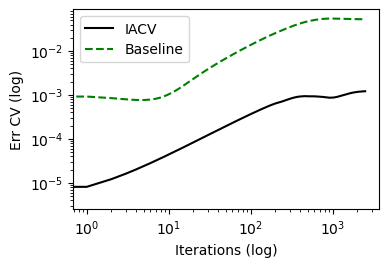

<Figure size 640x480 with 0 Axes>

In [25]:
fig, ax = plt.subplots()
ax.plot(clf.err_cv_["IACV"], label="IACV", c='black')
ax.plot(clf.err_cv_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err CV (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

## fig, ax = plt.subplots()
start = 0
ax.plot(lambdas[start:], iacv_means[start:], label="IACV")
ax.plot(lambdas[start:], true_means[start:], label="true", linestyle="--")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Mean of CV Iterates")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_lambda_coef_mod.pgf', bbox_inches='tight', pad_inches=0)